### Lushan Map
Code to produce Area around the Lushan Earthquake and corresponding gravity stations

In [52]:
# imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [55]:
# df with relative gravity station coordinates

df = pd.read_csv('gravitystations.txt', sep='\t')

In [54]:
# update df to only include points within desired latitude and longitude

lat_min = 26.0
lat_max = 32.0
lon_min = 100.0
lon_max = 105.0

df['lat'] = df['lat'].astype(float)
df['long'] = df['long'].astype(float)

df = df[(df['lat'] >= lat_min) & (df['lat'] <= lat_max) &
                 (df['long'] >= lon_min) & (df['long'] <= lon_max)]

In [56]:
# df with absolute gravity station locations and earthquake center
stations_df = pd.read_csv('absgravitystations.txt', sep=' ')

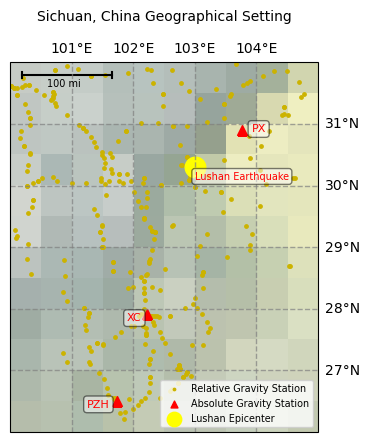

In [64]:
# Make map

# set projection type
proj = ccrs.PlateCarree()

# make figure
plt.figure()
ax = plt.axes(projection=proj)
ax.stock_img()
ax.set_title('Sichuan, China Geographical Setting', fontsize=10, pad=15)

# set extent boundaries
extent = [100, 105, 26, 32]
ax.set_extent(extent)

# make latitude and longitude gridlines
grid = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.7, linestyle='--')
grid.left_labels = False
grid.bottom_labels = False

ax.scatter(df['long'], df['lat'], color=(.8, .7, 0), marker='o', s=6, transform=proj, label="Relative Gravity Station")
ax.scatter(stations_df['long'], stations_df['lat'], color='red', marker='^', s=50, transform=proj, label="Absolute Gravity Station")
ax.scatter(103.0, 30.3, color='yellow', marker='o', s=220, label="Lushan Epicenter")

ax.text(103, 30.1, "Lushan Earthquake", fontsize=7, c="r", bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=.5))
ax.text(103.92, 30.87, "PX", fontsize=8, c="r", bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=.5))
ax.text(101.9, 27.8, "XC", fontsize=8, c="r", bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=.5))
ax.text(101.25, 26.4, "PZH", fontsize=8, c="r", bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=.5))

ax.plot([100.2, 101.65], [31.8, 31.8], color='k', transform=proj)
ax.plot([100.2, 100.2], [31.75, 31.85], color='k', transform=proj)
ax.plot([101.65, 101.65], [31.75, 31.85], color='k', transform=proj)
ax.text(100.6, 31.6, "100 mi", fontsize=7)

plt.legend(loc="lower right", fontsize="x-small", markerscale=.7)
plt.show()